The following code has been manually translated from Spanish to English. Due to execution times, code subject to dependencies, mainly graphics, are still in the original language.

Authors:
- Alcalde Benítez, Patricia Fuxi
- Vulpe, Beatriz Noelia

In this section, we seek to explore visualizations that help us better understand the factors that affect the popularity of a song. The strategy is to employ different dimensional reduction techniques to represent the entire dataset in only two dimensions. This will facilitate visual interpretation and provide a clearer view of the relationships between features and song popularity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
X = pd.read_csv('train_ap1_mcp_23_24_train.csv')
X['title_length'] = X['song_name'].apply(lambda x: len(x))
X = X.drop(['song_id'], axis=1)

In [4]:
X

,song_name,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,title_length
0,I’ll Come Running (To Tie Your Shoe),34,0.5350,0.584,218227,0.459,0.034200,0,0.1530,-14.127,0,0.0319,124.465,3,0.7650,36
1,Mohican,47,0.3210,0.758,206600,0.503,0.000234,0,0.1210,-11.445,0,0.1600,120.027,3,0.4770,7
2,"Todo Quedó, Quedó (En Vivo) [feat. Nelsón Arri...",25,0.1680,0.732,304970,0.824,0.000021,11,0.9420,-9.296,0,0.1170,102.002,3,0.8260,50
3,Be Glorified,39,0.0726,0.553,307040,0.718,0.000003,8,0.1520,-6.385,0,0.0248,87.989,3,0.6770,12
4,Guilty Pleasure,57,0.0032,0.641,204435,0.844,0.000000,9,0.1060,-5.758,0,0.0465,150.030,3,0.8340,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Make Me Wanna,62,0.0369,0.545,225067,0.818,0.000000,0,0.1010,-6.380,0,0.0541,109.019,2,0.6790,13
23996,Maui Battles - Score Demo,41,0.2350,0.232,117733,0.587,0.918000,1,0.3950,-13.186,1,0.1010,81.943,3,0.1130,25
23997,6 Concerts transcrits en sextuor / 6e concert:...,15,0.8900,0.624,248733,0.269,0.879000,8,0.1200,-20.798,1,0.0391,128.212,2,0.3820,58
23998,"Puccini: La bohème, Act 1: ""O soave fanciulla""...",13,0.9780,0.196,248307,0.134,0.026100,5,0.1180,-13.981,1,0.0365,84.730,3,0.0386,92


As discussed in the previous section, we highlighted the remarkable influence of the song title on the prediction of popularity. Since exploring this issue in depth is not feasible following the criteria established in the section (applying dimensional reduction techniques), we have decided to add a short section with a more visual approach to such influence. We will use word clouds generated from song titles according to their popularity to effectively highlight this influence.


# **Word Clouds**

Word clouds are visual representations that show the most frequent words in a text dataset. In these visualizations, the size of each word is directly related to its frequency in the text: more frequent words appear larger and more prominent.

These provide an instant and intuitive view of the most relevant keywords or terms in a text dataset. They are especially useful for summarizing large amounts of information in a visually appealing way. In addition, word clouds can capture the essence and main theme of a text corpus, making it easy to identify patterns, trends, or in this case, the salient influence of words on the popularity of songs through their titles.

In this case, we propose to compare the least popular songs with the rest. We will define the least popular songs as those with a popularity equal to or lower than 20, based on the distribution of popularity in our dataset.

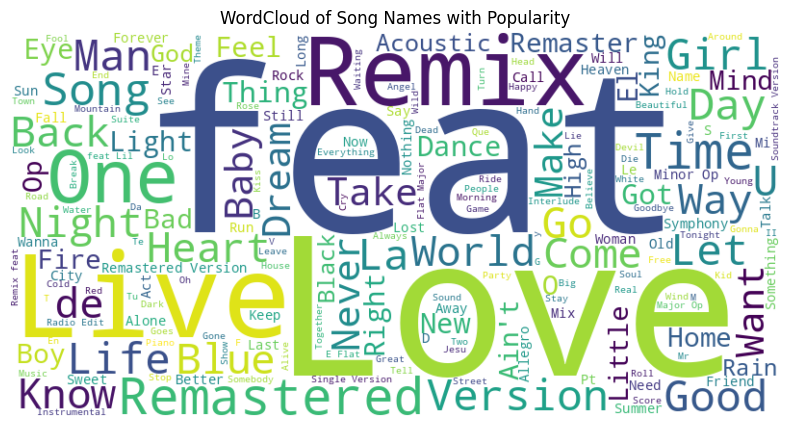

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# We select the songs
top_songs = top_songs = X[X['popularity'] > 20]

# We obtain the names of the songs
song_names = top_songs['song_name']

# Concatenate the names of the songs in a string
text = ' '.join(song_names)

# We create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Song Names with Popularity')
plt.show()


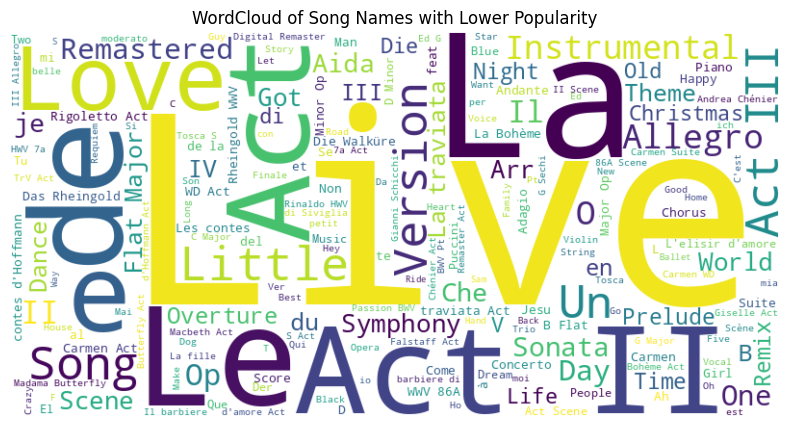

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# We select the songs given the criteria
top_songs = top_songs = X[X['popularity'] <= 20]

# We obtain the names of the songs
song_names = top_songs['song_name']

# Concatenate the names of the songs in a string
text = ' '.join(song_names)

# We create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Song Names with Lower Popularity')
plt.show()


As can be observed, the less popular songs present a classical theme, evidenced by the frequent appearance of words such as 'allegro', 'symphony', 'act II', 'Instrumental', 'Overture', which are common in the classical domain.

In contrast, the rest of the songs stand out for the collaborations ('feat'), remixes and names that include themes such as 'Time', 'Love', 'Girl', 'Man', 'Heart'.

# **Statistical relationships**

In [10]:
y = X['popularity']
X = X.drop(['popularity', 'song_name'], axis=1)

In [11]:
data_corr = pd.concat([X, y], axis=1)

**Correlation Matrix**

A correlation matrix is an essential tool in statistical and exploratory data analysis. This matrix provides a systematic view of the linear relationships between pairs of variables in a data set. Each entry in the matrix represents the correlation coefficient between two variables, which varies in the range from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 suggests a low correlation.

We will visualize the correlation matrix to analyze possible indications of influence of characteristics on popularity. It is important to note that although correlation can reveal associations between variables, it does not necessarily imply causation. The correlation matrix will allow us to identify linear relationships between characteristics and popularity, providing initial insight into how certain attributes may be related to each other and to the target variable. However, to establish causality, more detailed analysis and consideration of other relevant factors and variables would be required.

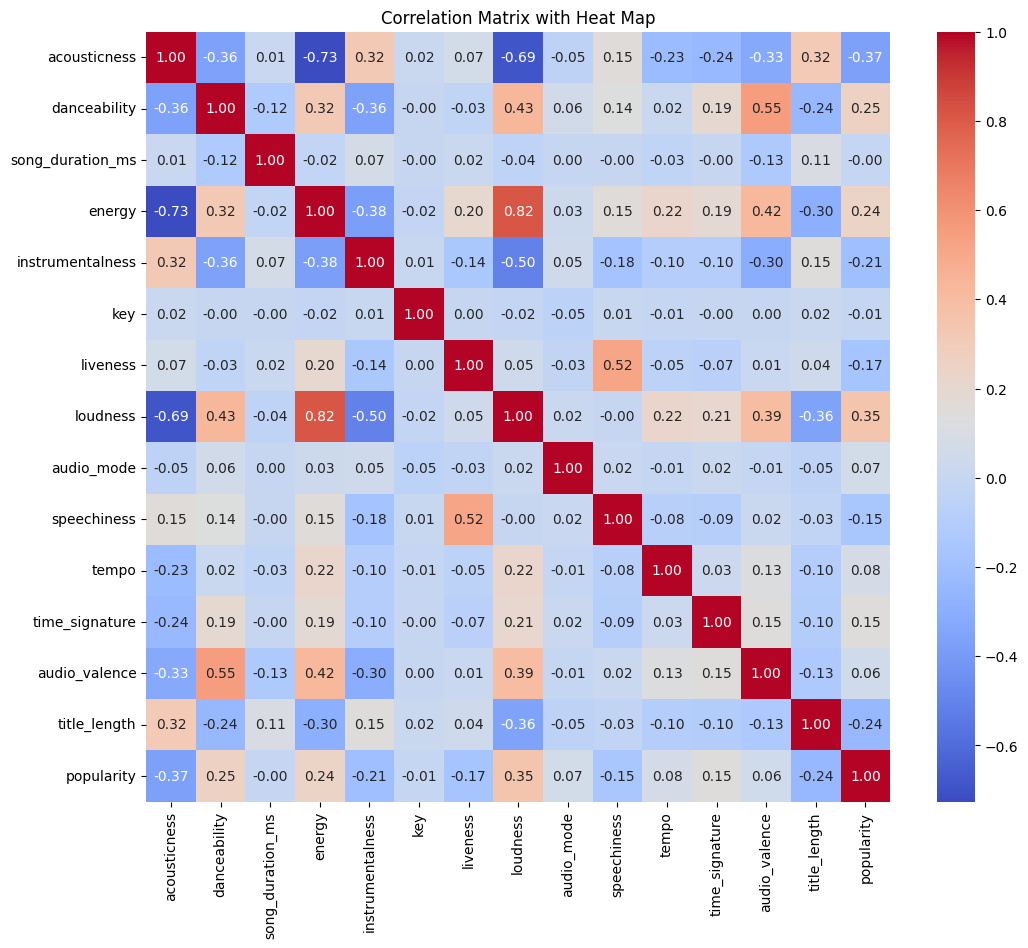

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Heat Map')
plt.show()


We have features such as `loudness, energy and dancebility` that seem to have a higher correlation with `popularity` than the other features.

**Joinplot**

We will use the `joinplot` function of the Seaborn library to visualize the relationship between each of the characteristics mentioned in the previous paragraph with the population and marginal distributions of each variable separately.

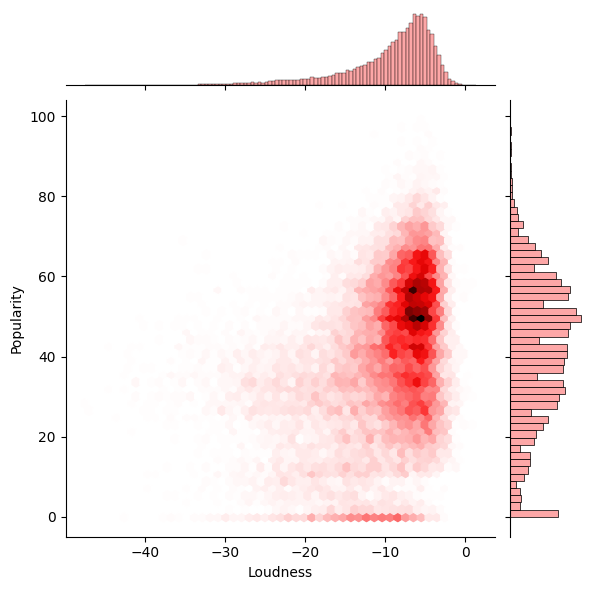

In [ ]:
import seaborn as sns
sns.jointplot(x=data_corr['loudness'], y=data_corr['popularity'], kind="hex", color="#FD8A8A").set_axis_labels("Loudness", "Popularity")
plt.show()

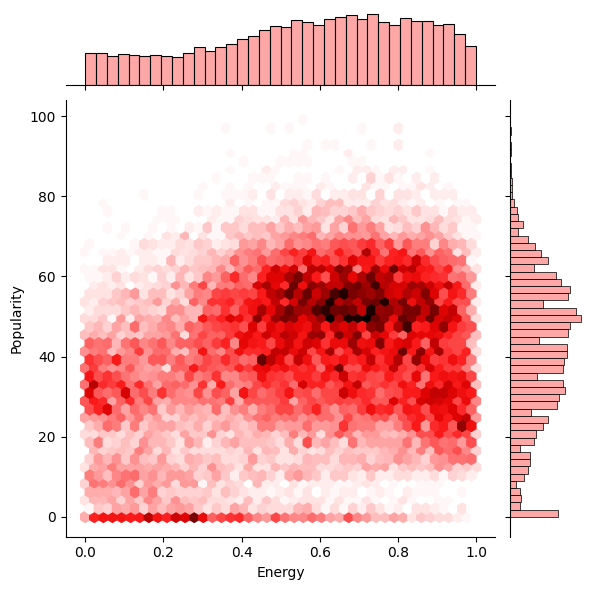

In [ ]:
sns.jointplot(x=data_corr['energy'], y=data_corr['popularity'], kind="hex", color="#FD8A8A").set_axis_labels("Energy", "Popularity")
plt.show()

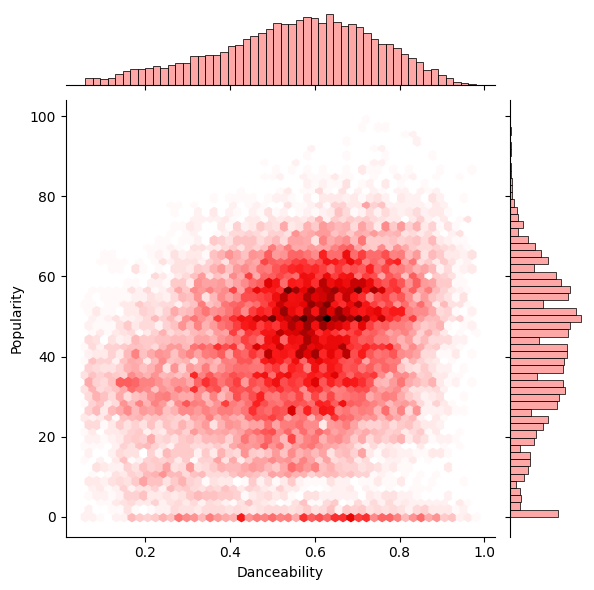

In [ ]:
sns.jointplot(x=data_corr['danceability'], y=data_corr['popularity'], kind="hex", color="#FD8A8A").set_axis_labels("Danceability", "Popularity")
plt.show()

The joinplot shows the dispersion of points between the two variables, which allows us to observe patterns, trends or clusters in the data. This can tell us about the nature of the generally popular songs. Later, with dimensionality reduction techniques, we will try to probe further into these aspects.

# **2. PCA**

We apply `PCA` to reduce to two dimensions and obtain the 2 principal components. In addition, we will add arrows associated to each principal component that will provide us with information about the influence of each one.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

We visualize the dataset

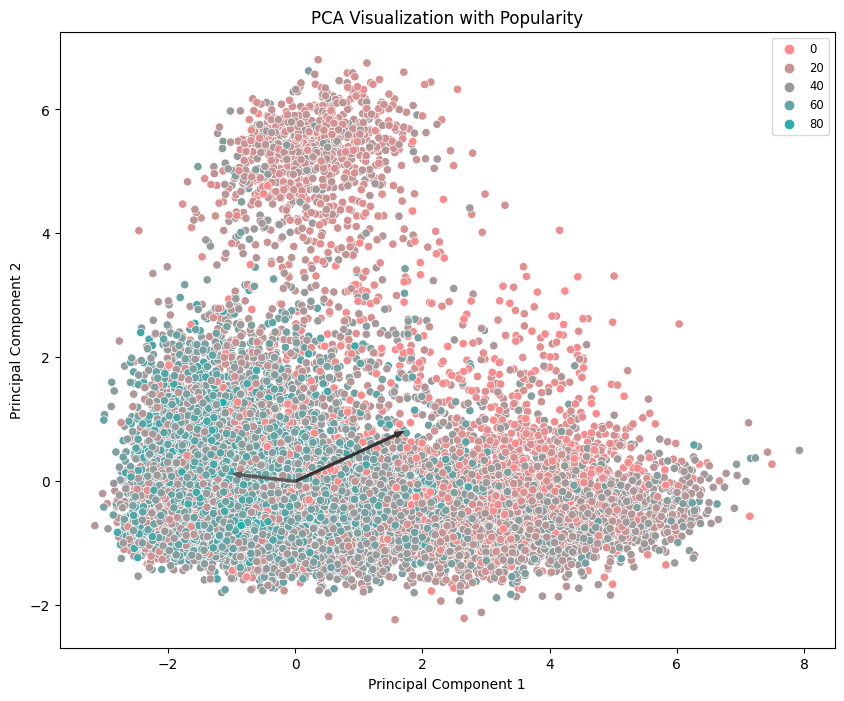

In [ ]:
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['popularity'] = y

importance = pca.explained_variance_ratio_
origin = np.mean(X_pca, axis=0)

pca1 = 2 * np.sqrt(pca.explained_variance_)[0] * pca.components_[:2, 0]
pca2 = 2 * np.sqrt(pca.explained_variance_)[1] * pca.components_[:2, 1]


# Scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='popularity', data=df_pca, palette=("blend:#FD8A8A,#00B5B5"))
plt.arrow(*origin, *pca1, color='#333333', width=0.03)
plt.arrow(*origin, *pca2, color='#595959', width=0.03)
plt.title('PCA Visualization with Popularity')
plt.legend(fontsize='small')
plt.show()

Excluding the color distinction based on popularity, a division into two noticeable groups is observed in the visualization, with the majority group being oval in shape. This pattern suggests that one of the principal components has a more significant influence than the other on the distribution of songs in two-dimensional space. This inference is supported by the arrows indicating the direction and magnitude of the principal components, showing notable differences between them. The presence of two clearly defined groups and the skewness in the distribution suggest that certain attributes or combinations of attributes may be contributing distinctively to the variability observed in the dataset.

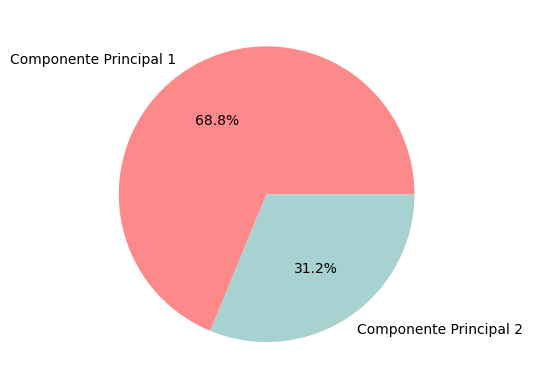

In [ ]:
plt.pie(pca.explained_variance_ratio_, labels=['Componente Principal 1', 'Componente Principal 2'],
        colors=('#FD8A8A','#A8D1D1'), autopct='%1.1f%%')
plt.show()

It is highlighted that Principal Component 1 is responsible for explaining almost 70% of the variance in the data. This finding is consistent with the observation in the previous graph, where, when plotting the arrows associated with the principal components, it was evident that the arrow corresponding to the right was considerably larger. This difference in magnitude suggests that Principal Component 1 has a more significant importance in the variability of the data set, supporting the conclusion that certain attributes or combinations of attributes related to Principal Component 1 contribute prominently to the structure of the observed two-dimensional space.

## **PCA loadings**


The loadings are the weights assigned to each original variable in the construction of these principal components. These coefficients capture the relative contribution of each variable to the total variability of the data set. A high loading indicates a strong influence of a specific variable in the formation of a principal component.

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

<ipython-input-25-607729172754>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(loadings['PC1'], loadings['PC2'], alpha=0.5, cmap='Set3')


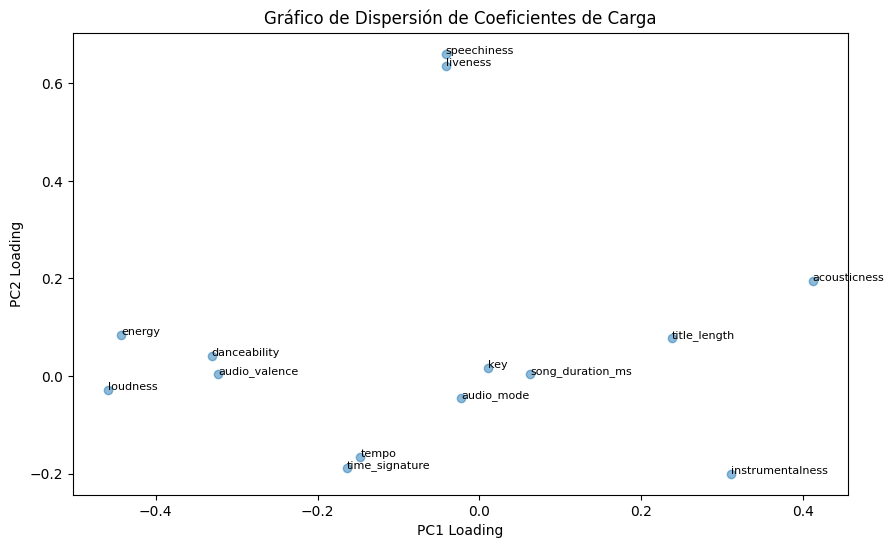

In [ ]:
# Scatter plot of loadings
plt.figure(figsize=(10, 6))
plt.scatter(loadings['PC1'], loadings['PC2'], alpha=0.5, cmap='Set3')
plt.title('Gráfico de Dispersión de Coeficientes de Carga')
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')

# Label each point with the name of the feature.
for feature, (pc1, pc2) in loadings.iterrows():
    plt.text(pc1, pc2, feature, fontsize=8)

plt.show()

The variables that most influence component 1 are `acousticness`, `instrumentalness` and `title_length`. On the other hand, the most influential variables in the second component are `speechness` and `liveness`.

## **Segmentation of PCA data into clusters**

Furthermore, when considering color-coded popularity information in the PCA visualization, a significantly higher density of popularity values is observed on the lower left side of the graph. To further explore this pattern, we will employ a k-means clustering model.

We will set the number of clusters (n_clusters) to 3, taking into account both the structure and color information in the graph. This approach will allow us to explore and categorize possible clustering or latent patterns in the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


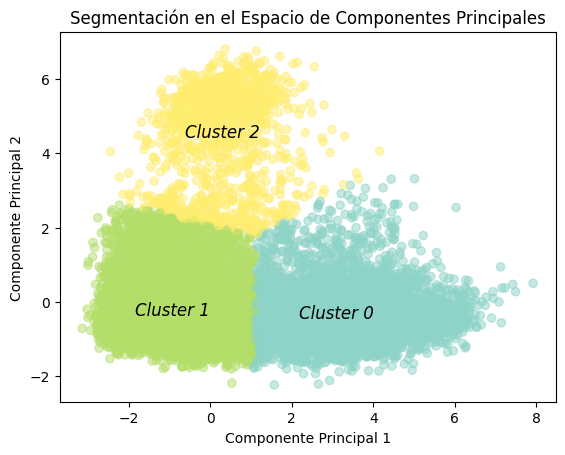

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the segmentation in the space of principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set3', alpha=0.5)
plt.title('Segmentación en el Espacio de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Add labels with cluster number
for i, cluster in enumerate(set(clusters)):
    # Find the points corresponding to the current cluster
    points_in_cluster = X_pca[clusters == cluster]

    # Calculate the centroid of the cluster to locate the label.
    centroid = points_in_cluster.mean(axis=0)

    # Add the cluster number as a label
    plt.text(centroid[0], centroid[1], f'Cluster {cluster}', fontsize=12, color='black', ha='center', va='center', style='italic')

plt.show()

Once we have obtained these clusters, which fit our previous observations, we will visualize the distribution of popularity in each cluster. This will allow us to highlight and validate the hypotheses formulated regarding the concentration of popularity in the lower left side of the PCA plot.

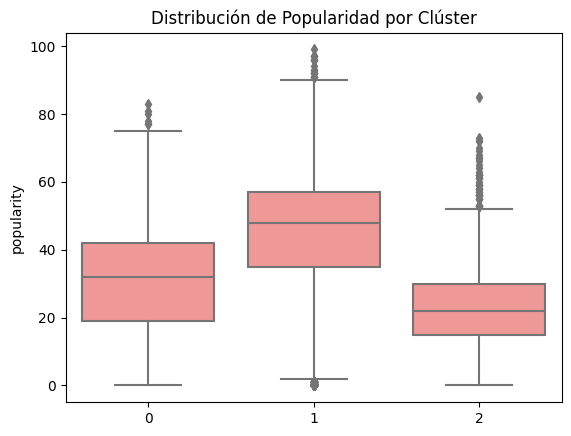

In [ ]:
sns.boxplot(x=clusters, y= y, color='#FD8A8A')
plt.title('Distribución de Popularidad por Clúster')
plt.show()


We can see that cluster 1 has a higher popularity distribution.

Plotting the centroids of each cluster in two-dimensional space can provide information about the central position of the groups and help visualize the separation between clusters.

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
cluster_centers

,PC1,PC2
0,3.087543,-0.302421
1,-0.924116,-0.237640
2,0.289533,4.561130


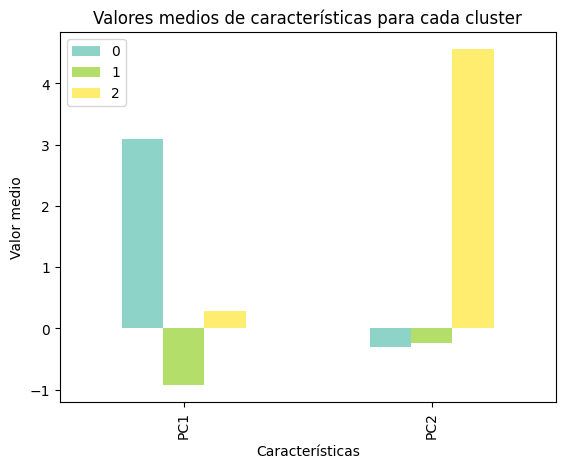

In [ ]:
cluster_centers.T.plot(kind='bar',cmap='Set3')
plt.title('Valores medios de características para cada cluster')
plt.ylabel('Valor medio')
plt.xlabel('Características')
plt.show()

In the two-dimensional space, the cluster of interest (cluster 1) is mainly characterized by Principal Component 1 (PC1). According to the previous analysis, the variables that most influence Component 1 are acousticness, instrumentalness and title_length.

Considering also the analysis of the song title, where a clear influence of the musical genre (classical - less popular) is observed, it could be argued that the importance of acousticness and instrumentalness is logical in this context. These characteristics could be contributing significantly to the formation of cluster 1, which is associated with less popular songs and with more prominent acoustic and instrumental characteristics.

# **3. T-SNE**

T-SNE is a dimensionality reduction technique that stands out for its ability to visualize local clustering and relationships in the data.

In [ ]:
from sklearn.manifold import TSNE
perplexity = 60 #@param {type: "slider", min: 20, max: 90, step: 5}
tsne = TSNE(n_components=2, perplexity=perplexity)
X_scaled = StandardScaler().fit_transform(X)
X_projected = tsne.fit_transform(X_scaled)

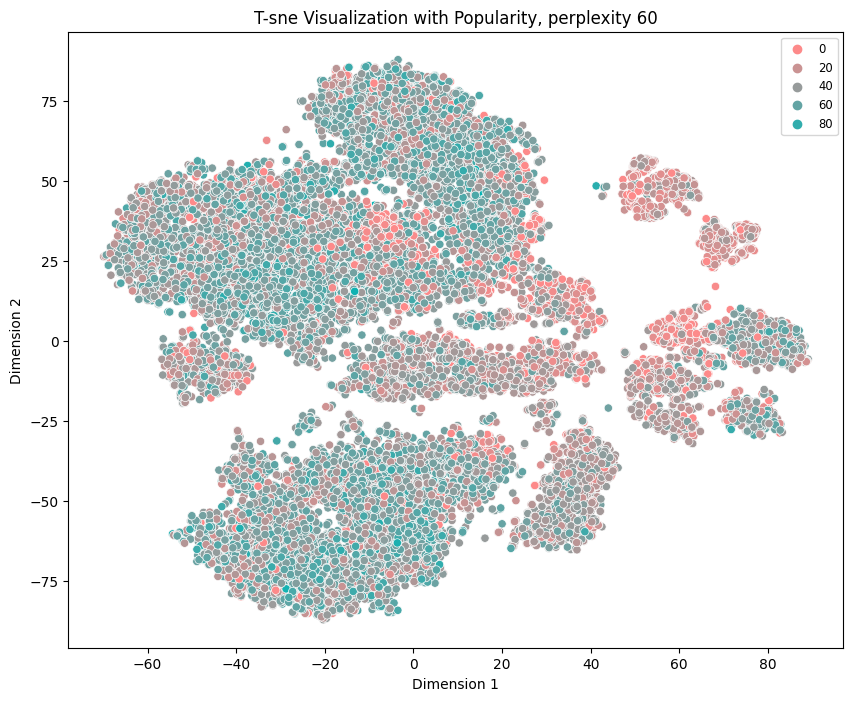

In [ ]:
df_tsne = pd.DataFrame(data=X_projected, columns=['Dimension 1', 'Dimension 2'])
df_tsne['popularity'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='popularity', data=df_tsne, palette=("blend:#FD8A8A,#00B5B5"))
plt.title(f'T-sne Visualization with Popularity, perplexity {perplexity}')
plt.legend(fontsize='small')
plt.show()

Using this technique we can also observe certain characteristics in terms of shape and color coding, but given its grouping with a higher number of clusters, we consider that k-means would not return insights very close to what is seen visually.

# **4. ISOMAP**

ISOMAP is a dimensionality reduction technique that seeks to preserve the geodesic distances between all pairs of points in a dataset. In doing so, ISOMAP captures the intrinsic structure of the data, especially in cases where nonlinear relationships are crucial.

Due to RAM limitations in Google Colab, we will work on subsets of the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.manifold import Isomap
import seaborn as sns
import matplotlib.pyplot as plt

isomap = Isomap(n_components=2, n_neighbors=30)

# Configuring a seed for reproducibility
np.random.seed(42)

# number of samples
num_samples = 15000

X_random_subset = X.sample(n=num_samples, random_state=42)

X_scaled = StandardScaler().fit_transform(X_random_subset)
X_isomap = isomap.fit_transform(X_scaled)

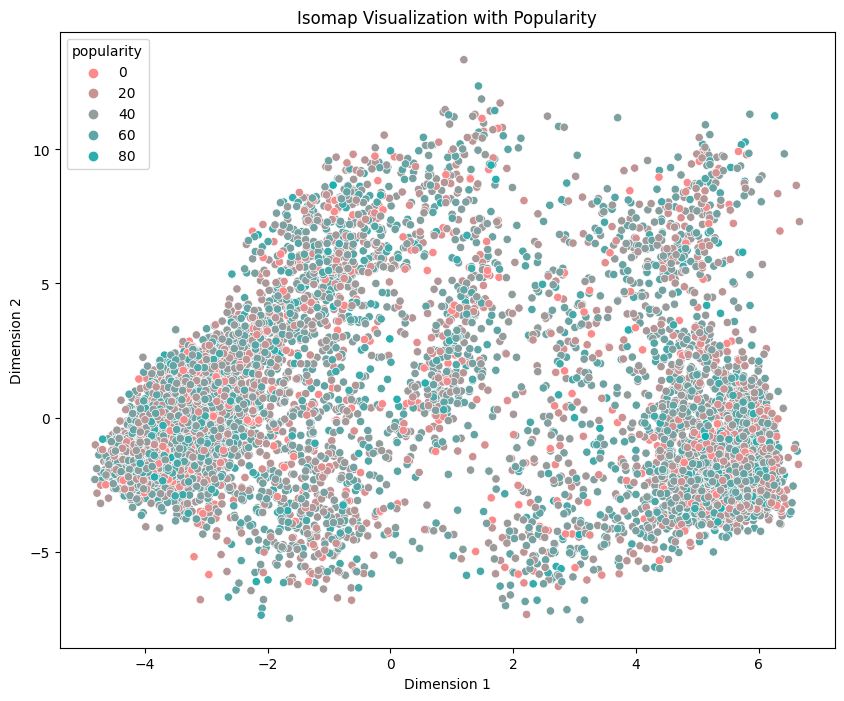

In [ ]:
df_isomap = pd.DataFrame(data=X_isomap, columns=['Dimension 1', 'Dimension 2'])
df_isomap['popularity'] = y.loc[X_random_subset.index]


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='popularity', data=df_isomap, palette=("blend:#FD8A8A,#00B5B5"))
plt.title('Isomap Visualization with Popularity')
plt.show()

On the other hand, visualization with ISOMAP brings us no apparent characterization of popularity.